In [705]:
import pandas as pd
import matplotlib.pyplot as plt

In [706]:
df = pd.read_csv("survey_results_public.csv")

In [707]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [708]:
df = df[["Country","EdLevel","YearsCodePro","Employment","Age","Gender","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,Man,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",18-24 years old,Man,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",18-24 years old,Man,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,35-44 years old,Man,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",25-34 years old,Man,NaN


In [709]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Age,Gender,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",25-34 years old,Man,62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,25-34 years old,Man,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,25-34 years old,Man,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,25-34 years old,Man,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,25-34 years old,Man,17748.0


In [710]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Age             0
Gender          0
Salary          0
dtype: int64

In [711]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment",axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40061 entries, 9 to 83438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40061 non-null  object 
 1   EdLevel       40061 non-null  object 
 2   YearsCodePro  40061 non-null  object 
 3   Age           40061 non-null  object 
 4   Gender        40061 non-null  object 
 5   Salary        40061 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [712]:
df["Country"].value_counts()

United States of America                                9118
India                                                   3375
Germany                                                 2746
United Kingdom of Great Britain and Northern Ireland    2597
Canada                                                  1546
                                                        ... 
Dominica                                                   1
Libyan Arab Jamahiriya                                     1
Monaco                                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [713]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

In [714]:
country_map = shorten_categories(df.Country.value_counts(),400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Other                                                   10691
United States of America                                 9118
India                                                    3375
Germany                                                  2746
United Kingdom of Great Britain and Northern Ireland     2597
Canada                                                   1546
France                                                   1390
Brazil                                                   1338
Spain                                                     886
Netherlands                                               831
Australia                                                 824
Poland                                                    775
Italy                                                     755
Russian Federation                                        739
Sweden                                                    732
Turkey                                                    457
Switzerl

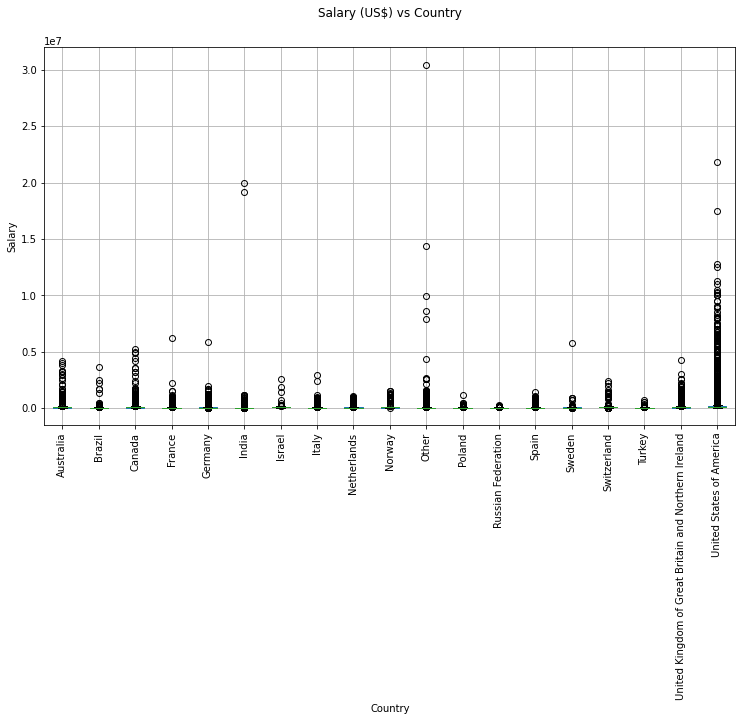

In [715]:
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [716]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 5000]
df = df[df["Country"] != "Other"]

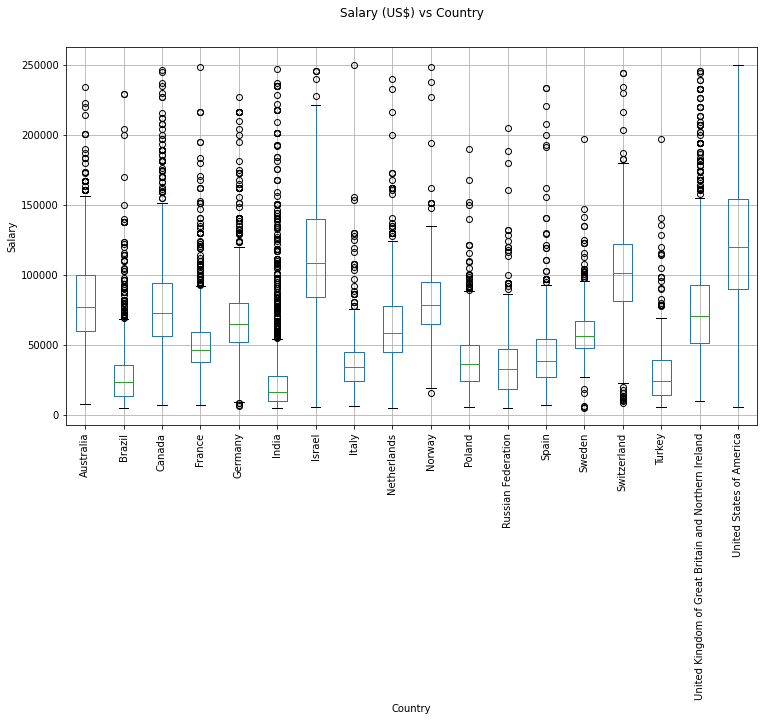

In [717]:
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [718]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '7', '26', '34', '11', '25',
       '24', '22', '13', '9', '39', '20', '27', '23', '30', '19', '35',
       '33', '37', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '47', '45', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [719]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == 'Less than 1 year':
        return 0.6
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [720]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [721]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Other doctoral degree (Ph.D., Ed.D., etc.)' or 'Professional degree (JD, MD, etc.)' in x:
        return 'Post grad'
    return 'Less than a bachelor'

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [722]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad'], dtype=object)

In [723]:
df["Gender"].unique()

array(['Man', 'Woman', 'Prefer not to say',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:',
       'Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:',
       'Woman;Or, in your own words:',
       'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'],
      dtype=object)

In [724]:
def clean_gender(x):
    if 'Man' == x:
        return 'Man'
    if 'Woman' == x:
        return 'Woman'
    return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

In [725]:
df['Gender'].unique()

array(['Man', 'Woman', 'Other'], dtype=object)

In [726]:
df['Age'].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [727]:
def clean_age(x):
    if '25-34' in x:
        return '25-34'
    if '35-44'in x:
        return '35-44'
    if '45-54' in x:
        return '45-54'
    if '18-24' in x:
        return '18-24'
    if '55-64' in x:
        return '55-64'
    if '65 years or older' in x:
        return '65 years or older'
    if 'Under 18 years old' in x:
        return 'Under 18'
    return 'Other'

df['Age'] = df['Age'].apply(clean_age)

In [728]:
df['Age'].unique()

array(['25-34', '35-44', '45-54', '18-24', '55-64', '65 years or older',
       'Under 18', 'Other'], dtype=object)

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27152 entries, 9 to 83438
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27152 non-null  object 
 1   EdLevel       27152 non-null  object 
 2   YearsCodePro  27152 non-null  float64
 3   Age           27152 non-null  object 
 4   Gender        27152 non-null  object 
 5   Salary        27152 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.5+ MB


In [730]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([1, 0, 2])

In [731]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [732]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 2, 1])

In [733]:
le_age = LabelEncoder()
df['Age'] = le_age.fit_transform(df['Age'])
df['Age'].unique()

array([1, 2, 3, 0, 4, 5, 7, 6])

In [753]:
X = df.drop("Salary",axis = 1)
y = df["Salary"]

In [754]:
X

,Country,EdLevel,YearsCodePro,Age,Gender
9,13,1,4.0,1,0
11,12,0,5.0,1,0
12,4,1,6.0,1,0
16,15,0,2.0,1,0
17,2,0,6.0,1,0
...,...,...,...,...,...
83430,17,1,21.0,3,0
83432,2,0,0.6,0,2
83434,17,0,5.0,1,0
83436,17,2,4.0,1,0


In [735]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [736]:
y_pred = linear_reg.predict(X)

In [737]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [738]:
error

41770.26085682622

In [739]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [740]:
y_pred = dec_tree_reg.predict(X)

In [741]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,441.52


In [742]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [743]:
y_pred = random_forest_reg.predict(X)

In [744]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,651.38


In [745]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [746]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,267.63


In [747]:
X

,Country,EdLevel,YearsCodePro,Age,Gender
9,13,1,4.0,1,0
11,12,0,5.0,1,0
12,4,1,6.0,1,0
16,15,0,2.0,1,0
17,2,0,6.0,1,0
...,...,...,...,...,...
83430,17,1,21.0,3,0
83432,2,0,0.6,0,2
83434,17,0,5.0,1,0
83436,17,2,4.0,1,0


In [748]:
X = np.array([["India", "Master’s degree", 7, "35-44", "Man"]])
X

array([['India', 'Master’s degree', '7', '35-44', 'Man']], dtype='<U15')

In [749]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X[:, 3] = le_age.transform(X[:, 3])
X[:, 4] = le_gender.transform(X[:, 4])
X = X.astype(float)

In [750]:
y_pred = regressor.predict(X)
y_pred

d:\ml\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([25846.7761194])

In [751]:
df.head(1)

,Country,EdLevel,YearsCodePro,Age,Gender,Salary
9,13,1,4.0,1,0,51552.0


In [752]:
y_pred = regressor.predict(np.array([[13., 1., 4., 1., 0.]]))
y_pred

d:\ml\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([40309.6163522])

In [760]:
import pickle

In [762]:
data = { "model" : regressor,
        "le_country" : le_country, 
        "le_education" : le_education,
        "le_age" : le_age,
        "le_gender" : le_gender
       } 

In [763]:
data

{'model': DecisionTreeRegressor(max_depth=8, random_state=0),
 'le_country': LabelEncoder(),
 'le_education': LabelEncoder(),
 'le_age': LabelEncoder(),
 'le_gender': LabelEncoder()}

In [768]:
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [769]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_age = data["le_age"]
le_gender = data["le_gender"]

In [771]:
X

,Country,EdLevel,YearsCodePro,Age,Gender
9,13,1,4.0,1,0
11,12,0,5.0,1,0
12,4,1,6.0,1,0
16,15,0,2.0,1,0
17,2,0,6.0,1,0
...,...,...,...,...,...
83430,17,1,21.0,3,0
83432,2,0,0.6,0,2
83434,17,0,5.0,1,0
83436,17,2,4.0,1,0


In [773]:
X = np.array([["India", "Master’s degree", 7, "35-44", "Man"]])
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X[:, 3] = le_age.transform(X[:, 3])
X[:, 4] = le_gender.transform(X[:, 4])

y_pred = regressor_loaded.predict(X)
y_pred

d:\ml\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([25846.7761194])